# A/B тест
 Даны результаты A/B теста, цель которого выяснить, какая маркетинговая стратегия (Promotion) является наилучшей.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загружаем данные
data = pd.read_csv('WA_Marketing-Campaign.csv')
print(data.shape)
data.head()

(548, 7)


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [6]:
data.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [8]:
# Проверяем, нет ли пропусков
data.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [34]:
# Посмотрим на средние
data.groupby('Promotion')['SalesInThousands'].mean()

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

Text(0.5, 1.0, 'В зависимости от стратегии')

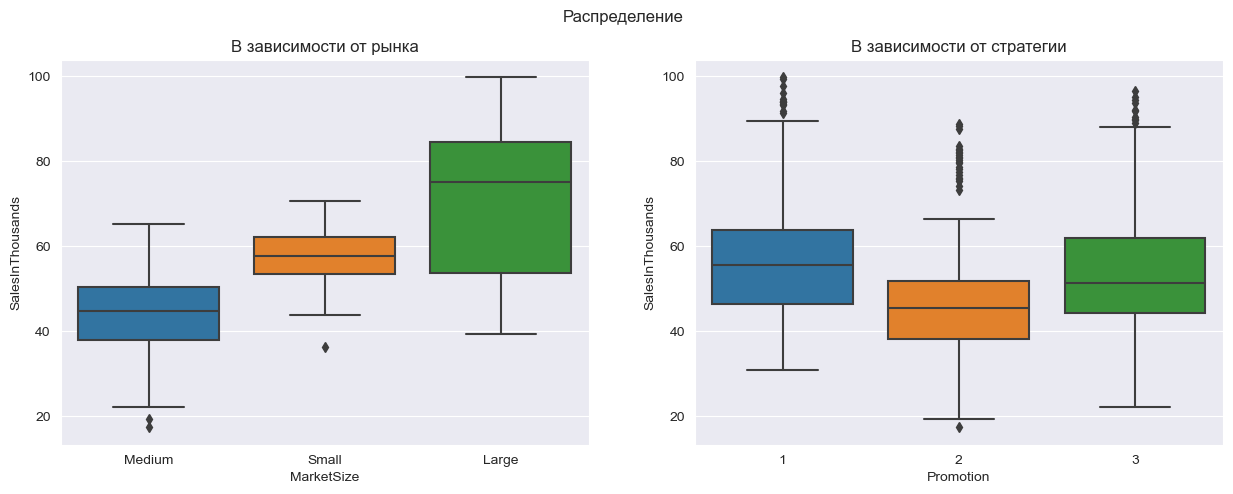

In [27]:
# Посмотрим на распределение продаж в зависимости от рынка и стратегии
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(data=data, x='MarketSize', y='SalesInThousands', ax=ax1)
sns.boxplot(data=data, x='Promotion', y='SalesInThousands', ax=ax2)
fig.suptitle('Распределение')
ax1.set_title('В зависимости от рынка')
ax2.set_title('В зависимости от стратегии')
plt.show()

##### Задание - выяснить, какая стратегия приносит большую прибыль. Для этого я воспользуюсь дисперсионным анализом, если данные распределены нормально.
##### Иначе критерием Краскела-Уоллиса

Проверим данные на нормальность

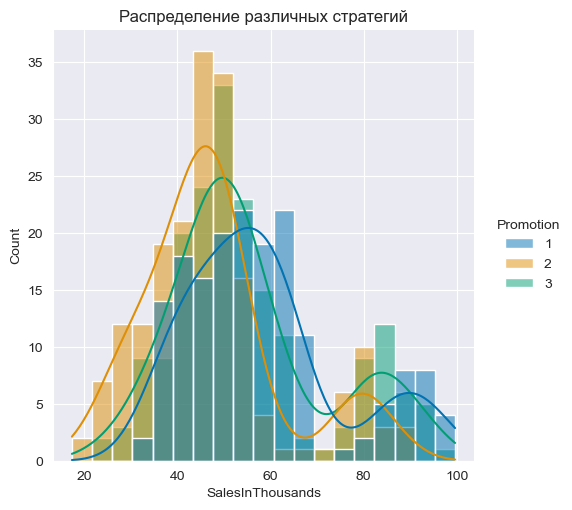

In [33]:
sns.displot(data=data, x="SalesInThousands", hue="Promotion", kde=True, palette='colorblind')
plt.title('Распределение различных стратегий')
plt.show()

In [37]:
# H0 - нормальное распределение, Н1 - закон распределения не является нормальным
from scipy.stats import shapiro
print('Стратегия 1:')
print(shapiro(data[data['Promotion'] == 1]['SalesInThousands']))
print('Стратегия 2:')
print(shapiro(data[data['Promotion'] == 2]['SalesInThousands']))
print('Стратегия 3:')
print(shapiro(data[data['Promotion'] == 3]['SalesInThousands']))

Стратегия 1:
ShapiroResult(statistic=0.9152998328208923, pvalue=1.9772498305314912e-08)
Стратегия 2:
ShapiroResult(statistic=0.9145088195800781, pvalue=5.456247009760773e-09)
Стратегия 3:
ShapiroResult(statistic=0.9207685589790344, pvalue=1.499518376135711e-08)


Из результатов видно, что все три p-value меньше 0,05, что позволяет нам отвергнуть 0-ю гипотезу
и сказать, что данные НЕ распределены нормально

In [52]:
# A/A test
from scipy.stats import kruskal
x1 = data[data['Promotion'] == 1]['SalesInThousands']
x2 = data[data['Promotion'] == 2]['SalesInThousands']
x3 = data[data['Promotion'] == 3]['SalesInThousands']
kruskal(x1.sample(frac=0.5), x1.sample(frac=0.5), x1.sample(frac=0.5))

KruskalResult(statistic=0.46686813379842, pvalue=0.7918098004946004)

Результатам А/В теста можно доверять

In [50]:
# Находим критерий Краскела-Уоллиса
# H0 - Медиана одинакова для всех групп
# H1 - Медиана не одинакова для всех групп
from scipy.stats import kruskal
kruskal(x1, x2, x3)

KruskalResult(statistic=53.29475169322799, pvalue=2.6741866266697816e-12)

# Вывод
P-value меньше 0,05. У нас есть достаточно доказательств, чтобы заключить, что тип маркетинговой стратегии
приводит к статистически значимым различиям в продажах. Рекомендуется использовать первую маркетинговую стратегию.

In [40]:
# Медианы
data.groupby('Promotion')['SalesInThousands'].median()

Promotion
1    55.385
2    45.385
3    51.165
Name: SalesInThousands, dtype: float64